In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import citipy
from citipy import citipy
from config import api_key


output_data_file = "output/cities.csv"

In [2]:
#Set ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

In [31]:
#Create lists for latitudes/longitudes and cities
lat_lngs = []
cities = []

# Use .random to select random latitudes/longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

#Use zip to combine latitudes/longitudes and put in list
lat_lngs = zip(lats, lngs)

# Using the list made, identify nearest city for latitudes/longitudes combinations
for lat_lng in lat_lngs:
    near_city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if near_city not in cities:
        cities.append(near_city)


593

In [4]:
city_list = []
max_temp_list = []
humidity_list = []
cloud_list = []
wind_speed_list = []

In [5]:
country_code_list = []
date_list = []
lat_list = []
lng_list = []

In [30]:
print(response)

{'coord': {'lon': 138.6333, 'lat': 35.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.94, 'feels_like': 17.4, 'temp_min': 24.8, 'temp_max': 25, 'pressure': 1013, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 3.89, 'deg': 315}, 'clouds': {'all': 1}, 'dt': 1611944655, 'sys': {'type': 1, 'id': 8073, 'country': 'JP', 'sunrise': 1611956831, 'sunset': 1611994205}, 'timezone': 32400, 'id': 1861454, 'name': 'Isawa', 'cod': 200}


In [7]:
index = 0
print("Begin")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
imperial = "imperial"

#Use f string to set up query url
query_url = f"{base_url}appid={api_key}&units={imperial}&q="

# For each city name in cities list, do below things...
for city in (cities):
    try:
        index += 1
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_code_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])

        if index == 619:
            break
        print(f"Processing Record #{index}, city name: {city}")
    except KeyError:
        print("Oops, that key doesn't exist.")

print("-----------------------------")
print("All Finished!")
print("-----------------------------")

Begin
Processing Record #1, city name: faanui
Processing Record #2, city name: kaniama
Processing Record #3, city name: bathsheba
Processing Record #4, city name: mataura
Processing Record #5, city name: guerrero negro
Processing Record #6, city name: albany
Oops, that key doesn't exist.
Processing Record #8, city name: rikitea
Processing Record #9, city name: isangel
Processing Record #10, city name: alofi
Processing Record #11, city name: butaritari
Processing Record #12, city name: punta arenas
Processing Record #13, city name: san carlos de bariloche
Processing Record #14, city name: cape town
Processing Record #15, city name: ushuaia
Processing Record #16, city name: cidreira
Oops, that key doesn't exist.
Processing Record #18, city name: laguna
Processing Record #19, city name: arraial do cabo
Processing Record #20, city name: jamestown
Oops, that key doesn't exist.
Processing Record #22, city name: benguela
Processing Record #23, city name: kaitangata
Processing Record #24, city

Processing Record #194, city name: rensvik
Processing Record #195, city name: knysna
Processing Record #196, city name: changde
Processing Record #197, city name: victoria
Processing Record #198, city name: majene
Processing Record #199, city name: methana
Processing Record #200, city name: guarapari
Processing Record #201, city name: kabare
Oops, that key doesn't exist.
Processing Record #203, city name: ambon
Processing Record #204, city name: madimba
Processing Record #205, city name: aklavik
Processing Record #206, city name: say
Processing Record #207, city name: quixada
Processing Record #208, city name: kruisfontein
Processing Record #209, city name: pingliang
Processing Record #210, city name: margate
Processing Record #211, city name: vaini
Processing Record #212, city name: am timan
Processing Record #213, city name: tuktoyaktuk
Processing Record #214, city name: isla mujeres
Processing Record #215, city name: nalut
Processing Record #216, city name: moose factory
Processing 

Processing Record #381, city name: takaungu
Processing Record #382, city name: cabo san lucas
Processing Record #383, city name: mingshui
Processing Record #384, city name: stephenville
Processing Record #385, city name: makarska
Processing Record #386, city name: steinbach
Processing Record #387, city name: itatiaia
Processing Record #388, city name: chamba
Processing Record #389, city name: dubrovnik
Processing Record #390, city name: airai
Processing Record #391, city name: kirakira
Processing Record #392, city name: esperance
Processing Record #393, city name: verkhnyaya inta
Processing Record #394, city name: san lazaro
Processing Record #395, city name: marawi
Processing Record #396, city name: seybaplaya
Oops, that key doesn't exist.
Processing Record #398, city name: tabuk
Oops, that key doesn't exist.
Oops, that key doesn't exist.
Processing Record #401, city name: roma
Processing Record #402, city name: caravelas
Processing Record #403, city name: mandal
Processing Record #40

Processing Record #573, city name: sergeyevka
Processing Record #574, city name: cap malheureux
Processing Record #575, city name: mwinilunga
Processing Record #576, city name: mweka
Oops, that key doesn't exist.
Processing Record #578, city name: khandbari
Processing Record #579, city name: kang
Processing Record #580, city name: punta umbria
Processing Record #581, city name: suhbaatar
Processing Record #582, city name: scituate
Processing Record #583, city name: isawa
-----------------------------
Data Retrieval Complete
-----------------------------


In [10]:
print(len(city_list))
print(len(cloud_list))
print(len(country_code_list))
print(len(date_list))
print(len(humidity_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(date_list))
print(len(wind_speed_list))

538
538
538
538
538
538
538
538
538
538


In [11]:
# Create a pandas dataframe using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloud_list,
                "Country" : country_code_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [12]:
weather_df.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

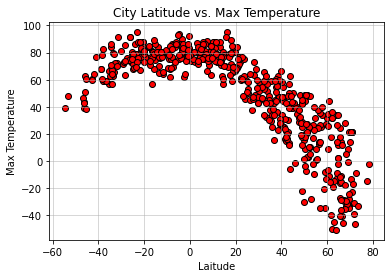

In [14]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "red", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set axis labels
plt.xlabel("Laitude")
plt.ylabel("Max Temperature")

# Set grid line
plt.grid(linewidth=.5, alpha = 1)

# # Save the plotted figure as .pngs
# plt.savefig("../Images/City Latitude vs Max Temperature.png")

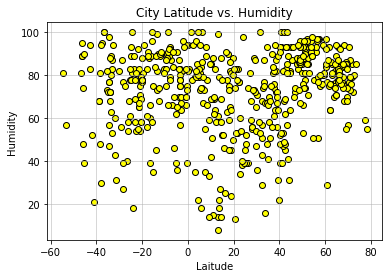

In [33]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "yellow", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set axis labels
plt.xlabel("Laitude")
plt.ylabel("Humidity")

# Set grid line
plt.grid(linewidth=.5, alpha = 1)

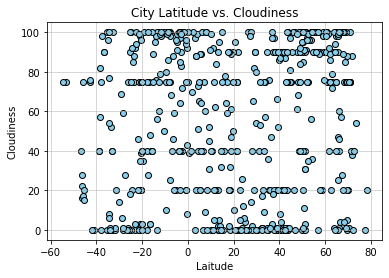

In [16]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "skyblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set axis labels
plt.xlabel("Laitude")
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linewidth=.5, alpha = 1)

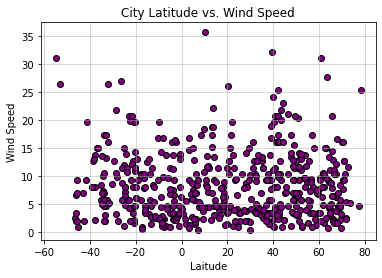

In [17]:
# Create scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "purple", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed")

# Set axis labels
plt.xlabel("Laitude")
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linewidth=.5, alpha = 1)


In [18]:
from datetime import datetime
ts = int("1611860897")
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d'))

2021-01-28


In [19]:
weather_df['date'] = pd.to_datetime(weather_df['Date'],unit='s')

In [20]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,date
0,Faanui,48,PF,1611944616,66,-16.4833,-151.7500,81.16,7.85,2021-01-29 18:23:36
1,Kaniama,68,CD,1611944616,87,-7.5667,24.1833,69.73,1.05,2021-01-29 18:23:36
2,Bathsheba,20,BB,1611944616,61,13.2167,-59.5167,84.20,17.27,2021-01-29 18:23:36
3,Mataura,16,NZ,1611944617,95,-46.1927,168.8643,38.88,2.01,2021-01-29 18:23:37
4,Guerrero Negro,2,MX,1611944617,56,27.9769,-114.0611,63.39,8.72,2021-01-29 18:23:37
...,...,...,...,...,...,...,...,...,...,...
533,Kang,88,BW,1611944774,89,-23.6752,22.7876,69.31,10.76,2021-01-29 18:26:14
534,Punta Umbría,18,ES,1611944774,84,37.1821,-6.9661,59.00,3.00,2021-01-29 18:26:14
535,Sühbaatar,100,MN,1611944774,89,50.2314,106.2078,-3.87,3.27,2021-01-29 18:26:14
536,Scituate,20,US,1611944775,49,42.1959,-70.7259,18.00,10.36,2021-01-29 18:26:15


In [21]:
Northern_Hem = weather_df[weather_df.Lat >= 0]
Southern_Hem = weather_df[weather_df.Lat <= 0]

In [22]:
from sklearn.linear_model import LinearRegression

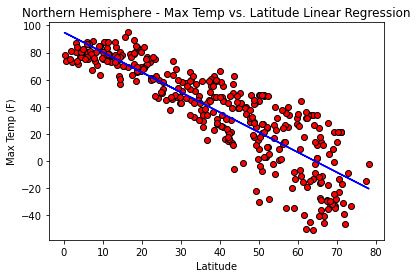

In [23]:
Lat_N = Northern_Hem.iloc[:, 5].values.reshape(-1, 1)  # values converts it into a numpy array
Lat_S = Southern_Hem.iloc[:, 5].values.reshape(-1, 1)  # values converts it into a numpy array

Temp_N = Northern_Hem.iloc[:, 7].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
Temp_S = Southern_Hem.iloc[:, 7].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

Humidity_N = Northern_Hem.iloc[:, 4].values.reshape(-1, 1)  # values converts it into a numpy array
Humidity_S = Southern_Hem.iloc[:, 4].values.reshape(-1, 1)  # values converts it into a numpy array

Cloudiness_N = Northern_Hem.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
Cloudiness_S = Southern_Hem.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

Wind_Speed_N = Northern_Hem.iloc[:, 8].values.reshape(-1, 1)  # values converts it into a numpy array
Wind_Speed_S = Southern_Hem.iloc[:, 8].values.reshape(-1, 1)  # values converts it into a numpy array


linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(Lat_N, Temp_N)  # perform linear regression
Temp_N_Predict = linear_regressor.predict(Lat_N)  # make predictions



plt.scatter(Lat_N, Temp_N, facecolor = "red", edgecolor = "black")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.plot(Lat_N, Temp_N_Predict, color='blue')
plt.show()


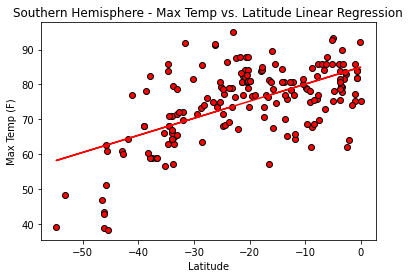

In [24]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(Lat_S, Temp_S)  # perform linear regression
Temp_S_Predict = linear_regressor.predict(Lat_S)  # make predictions



plt.scatter(Lat_S, Temp_S, facecolor = "red", edgecolor = "black")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.plot(Lat_S, Temp_S_Predict, color='red')
plt.show()

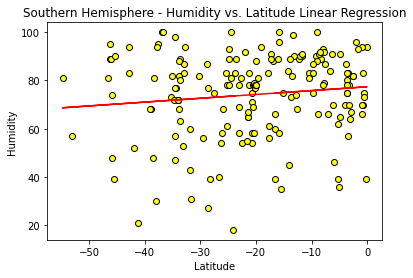

In [25]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(Lat_S, Humidity_S)  # perform linear regression
Humidity_S_Predict = linear_regressor.predict(Lat_S)  # make predictions



plt.scatter(Lat_S, Humidity_S, facecolor = "yellow", edgecolor = "black")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(Lat_S, Humidity_S_Predict, color='red')
plt.show()

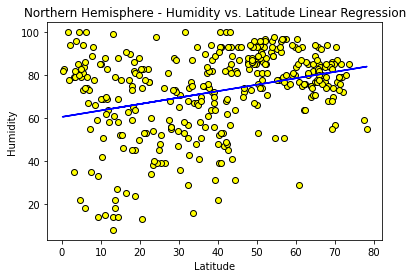

In [26]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(Lat_N, Humidity_N)  # perform linear regression
Humidity_N_Predict = linear_regressor.predict(Lat_N)  # make predictions



plt.scatter(Lat_N, Humidity_N, facecolor = "yellow", edgecolor = "black")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(Lat_N, Humidity_N_Predict, color='blue')
plt.show()

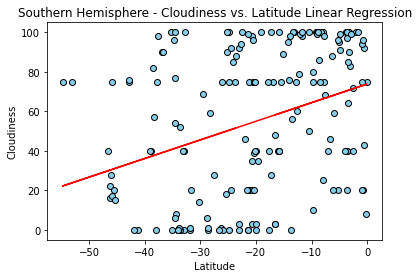

In [27]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(Lat_S, Cloudiness_S)  # perform linear regression
Cloudiness_S_Predict = linear_regressor.predict(Lat_S)  # make predictions




plt.scatter(Lat_S, Cloudiness_S, facecolor = "skyblue", edgecolor = "black")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(Lat_S, Cloudiness_S_Predict, color='red')
plt.show()

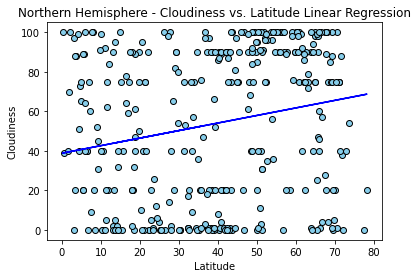

In [28]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(Lat_N, Cloudiness_N)  # perform linear regression
Cloudiness_N_Predict = linear_regressor.predict(Lat_N)  # make predictions


plt.scatter(Lat_N, Cloudiness_N, facecolor = "skyblue", edgecolor = "black")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(Lat_N, Cloudiness_N_Predict, color='blue')
plt.show()

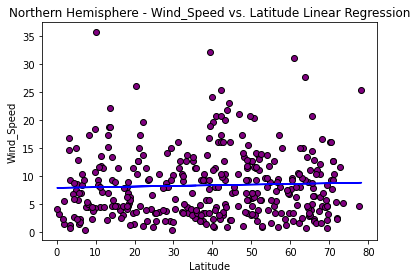

In [29]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(Lat_N, Wind_Speed_N)  # perform linear regression
Wind_Speed_N_Predict = linear_regressor.predict(Lat_N)  # make predictions


plt.scatter(Lat_N, Wind_Speed_N, facecolor = "purple", edgecolor = "black")
plt.title("Northern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.plot(Lat_N, Wind_Speed_N_Predict, color='blue')
plt.show()

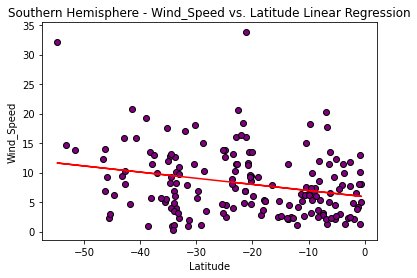

In [31]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(Lat_S, Wind_Speed_S)  # perform linear regression
Wind_Speed_S_Predict = linear_regressor.predict(Lat_S)  # make predictions


plt.scatter(Lat_S, Wind_Speed_S, facecolor = "purple", edgecolor = "black")
plt.title("Southern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.plot(Lat_S, Wind_Speed_S_Predict, color='red')
plt.show()

In [34]:
weather_df.to_csv("output/cities.csv", index = False)